### Copyright 2021-2023 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Sorting an array using insertionsort and visualize the single steps

In [1]:
def insertionsort(a):
    global steps, separation_graph_data
    steps=[]
    separation_graph_data=[]

    # the key to be inserted is stored in an additional element at the end of the array (a[ARRAY_SIZE])
    # rationale: improve understandability of key comparisons and key assignments in output
    a.append(-1)
    
    # nothing yet sorted
    steps.append([[UNSORTED]*ARRAY_SIZE, [], [], a[:]])
    separation_graph_data.append([0,-1])
    # first element is already (and always) partially sorted
    steps.append([[PART_SORTED]+[UNSORTED]*(ARRAY_SIZE-1), [], [], a[:]])
    separation_graph_data.append([1,0])
    
    for j in range(1, ARRAY_SIZE):
        a[ARRAY_SIZE] = a[j]
        if output_assigned_keys:
            steps.append([[], [], [ARRAY_SIZE], a[:]])

        i = j-1
        while i >= 0 and a[i] > a[ARRAY_SIZE]:
            if output_compared_keys:
                steps.append([[], [i,ARRAY_SIZE], [], a[:]])

            a[i+1] = a[i]
            if output_assigned_keys:
                steps.append([[], [], [i+1], a[:]])

            i -= 1

        # key comparison check done in last condition check of for-loop?
        if i >= 0 and output_compared_keys:
            steps.append([[], [i,ARRAY_SIZE], [], a[:]])

        a[i+1] = a[ARRAY_SIZE]
        if output_assigned_keys:
            steps.append([[], [], [i+1], a[:]])

        separation_graph_data.append([len(steps),j])

        if j < ARRAY_SIZE-1:
            steps.append([[PART_SORTED]*(j+1)+[UNSORTED]*(ARRAY_SIZE-(j+1)), [], [], a[:]])
        else: # last loop: all elements sorted
            steps.append([[SORTED]*(ARRAY_SIZE), [], [], a[:]])
    
    return a[:-1] # do not include additional space for key in returned array, so remove last element

## Constants

In [2]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_ASSIGNMENT = 'sandybrown'
COL_SEP_GRAPH = 'bo-' # includes also style
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

# number of ticks on axes
NUM_X_TICKS = 10
NUM_Y_TICKS = 10

# graphical output: width of bars and size of fonts - two settings are given here
# use for good readability of fewer sorting steps, e.g. 20-25
#BAR_WIDTH = 20
#FONTSIZE_LEGEND = 20
#FONTSIZE_ELEMENTS = 24
#FONTSIZE_AXES = 24
#FONTSIZE_AXES_LEGEND = 20
# use for good readability of more sorting steps, e.g. 80-100
BAR_WIDTH = 8
FONTSIZE_LEGEND = 14
FONTSIZE_ELEMENTS = 14
FONTSIZE_AXES = 14
FONTSIZE_AXES_LEGEND = 14

## Helper functions

In [3]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=FONTSIZE_ELEMENTS)

def plot_states(x, states, a):
    # colors
    for y in range(ARRAY_SIZE):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
    # values
    plot_values(x, range(ARRAY_SIZE), a)

def plot_elements(x, y_vals, col, a):
    # colors
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, minimum], col)
    plot_interval(x, [maximum, maximum], col)
    # line between both elements
    if maximum-minimum > 1:
        plot_interval(x, [minimum+1, maximum-1], col, thick_lines = False)
    # values
    plot_values(x, [minimum,maximum], a)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=BAR_WIDTH, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//NUM_X_TICKS)), fontsize=FONTSIZE_AXES)
    plt.yticks(range(0, ARRAY_SIZE+1, max(1,ARRAY_SIZE//NUM_Y_TICKS)), fontsize=FONTSIZE_AXES)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE+1])
    #plt.axis('off')
    plt.xlabel("Sorting steps", fontsize=FONTSIZE_AXES_LEGEND)
    plt.ylabel("Indexes of array to be sorted", fontsize=FONTSIZE_AXES_LEGEND)

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[0]) > 0:
            plot_states(i, step[0], step[3])
        elif output_compared_keys and len(step[1]) > 0:
            plot_elements(i, step[1], COL_COMPARISON, step[3])
        elif output_assigned_keys and len(step[2]) > 0:
            plot_elements(i, step[2], COL_ASSIGNMENT, step[3])

    if plot_separation_graph:
        for i in range(len(separation_graph_data)-1):
            plt.plot([separation_graph_data[i][0], separation_graph_data[i+1][0]],
                     [separation_graph_data[i][1]+OFFSET, separation_graph_data[i+1][1]+OFFSET], COL_SEP_GRAPH)

    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=ARRAY_SIZE-OFFSET, color=COL_LAST_HORIZ_LINE)
   
    # show plot
    plt.show()

## Global variables for easier information exchange between algorithm and output functions

In [5]:
# steps contains the data for visualization of the single steps
# steps: [[states], [compared keys], [assigned keys], [array]]
# [states] state for each position is one of [sorted, partially sorted, unsorted]
# [compared keys]: two indexes in a list
# [assigned keys]: indexes in a list
# [array]: copy of array in current state
steps = []
# states for each position in array, indexes must fit to ordering in COLORS
UNSORTED = 2
PART_SORTED = 1
SORTED = 0

# separation_graph_data contains the values for line showing sorted, partially sorted and unsorted parts
separation_graph_data=[]

## Configuration data for keys in output 

In [6]:
# change output settings here
plot_separation_graph = False
plot_separation_graph = True
output_compared_keys = False
output_compared_keys = True
output_assigned_keys = False
output_assigned_keys = True

## Size of predefined tests

In [7]:
# The size of array in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

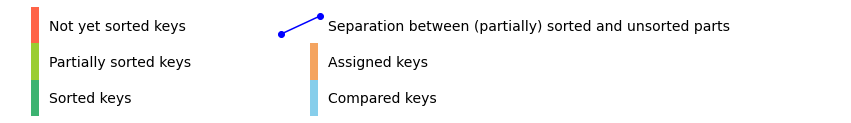

In [8]:
COLORS = [[COL_SORTED,"Sorted keys"], [COL_PART_SORTED,"Partially sorted keys"], [COL_UNSORTED,"Not yet sorted keys"],
          [COL_COMPARISON,"Compared keys"], [COL_ASSIGNMENT,"Assigned keys"], 
          [COL_SEP_GRAPH,"Separation between (partially) sorted and unsorted parts"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
for i in range(2):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.plot([9.8,11.2], [2.25,2.75], COLORS[5][0])
plt.text(11+OFFSET, 2+OFFSET, COLORS[5][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Generate test data and test algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


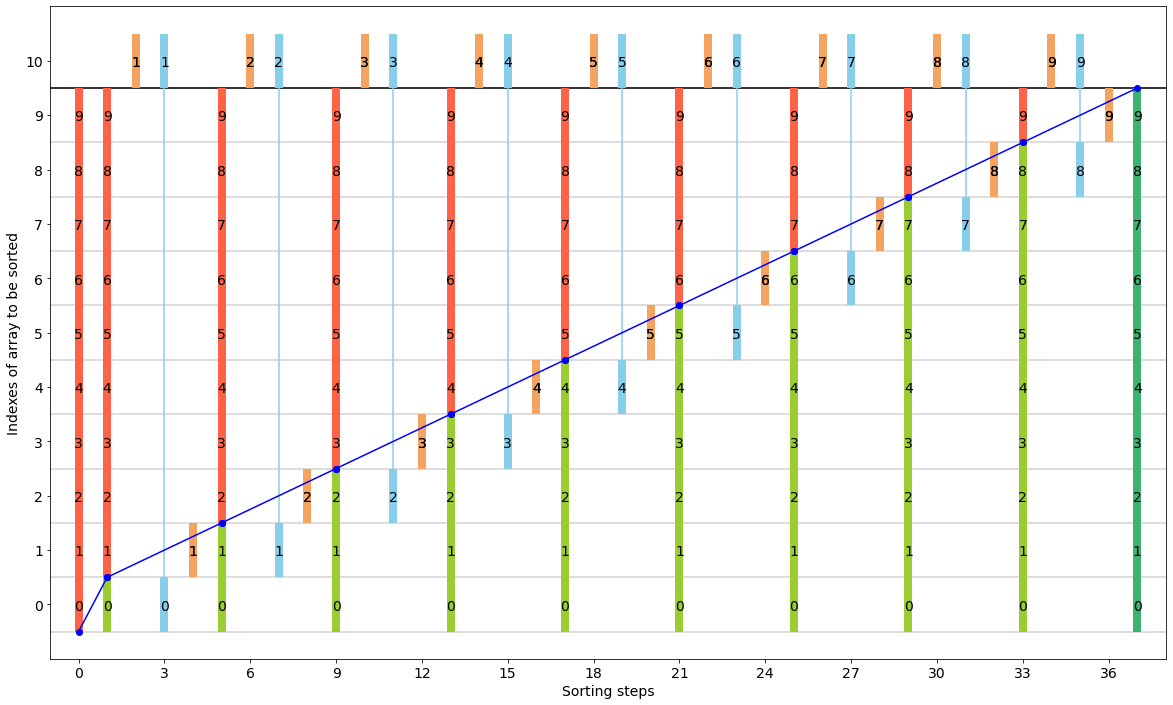

In [9]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, insertionsort(sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


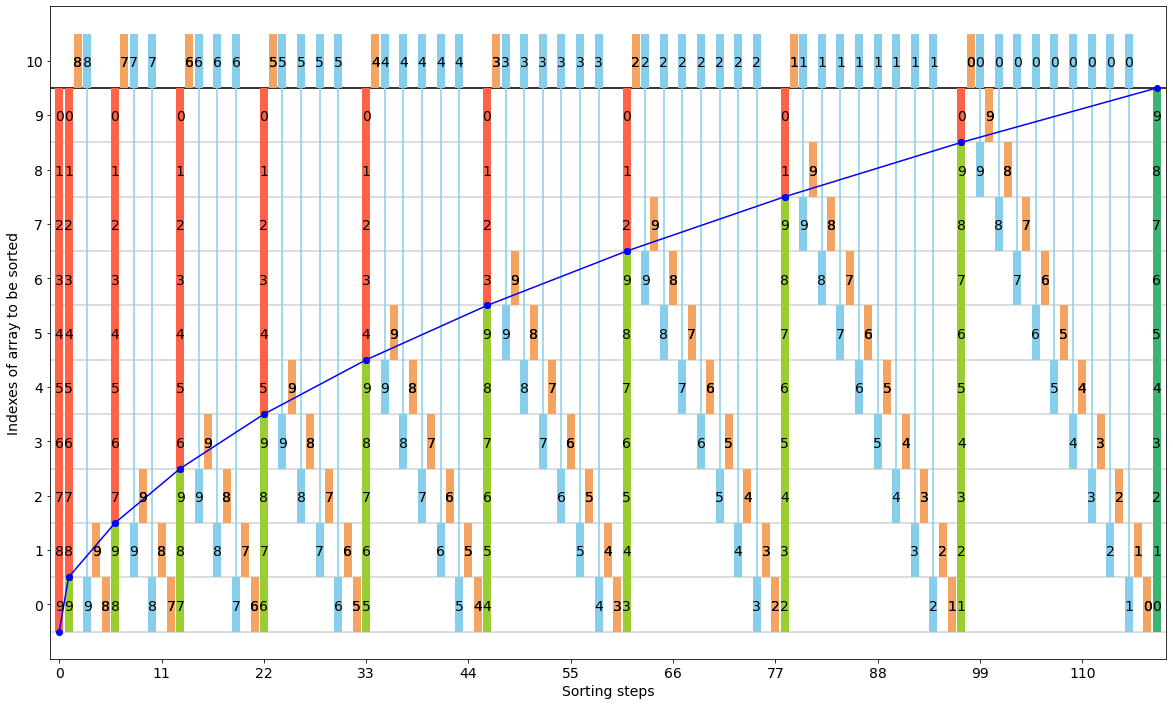

In [10]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, insertionsort(reverse_sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


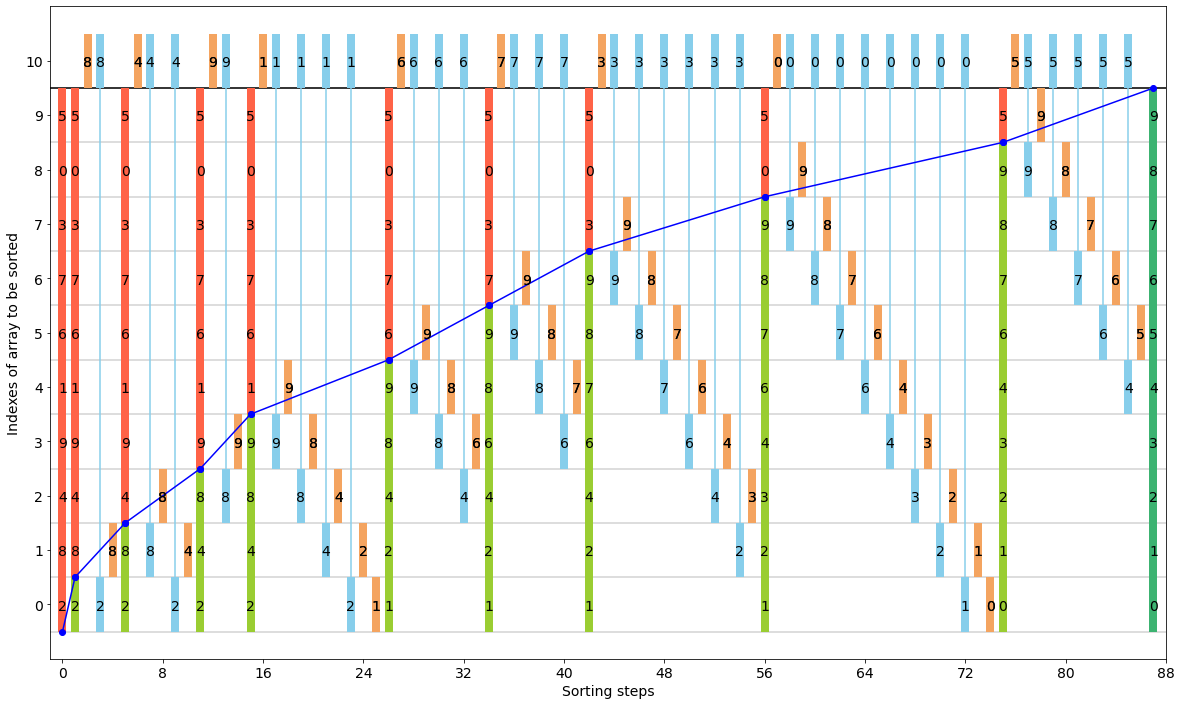

In [11]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, insertionsort(array))
output_graphical_view(ARRAY_SIZE)

### Your tests here ...

Before sorting: [4, 1, 3, 2, 0]
After  sorting: [0, 1, 2, 3, 4]


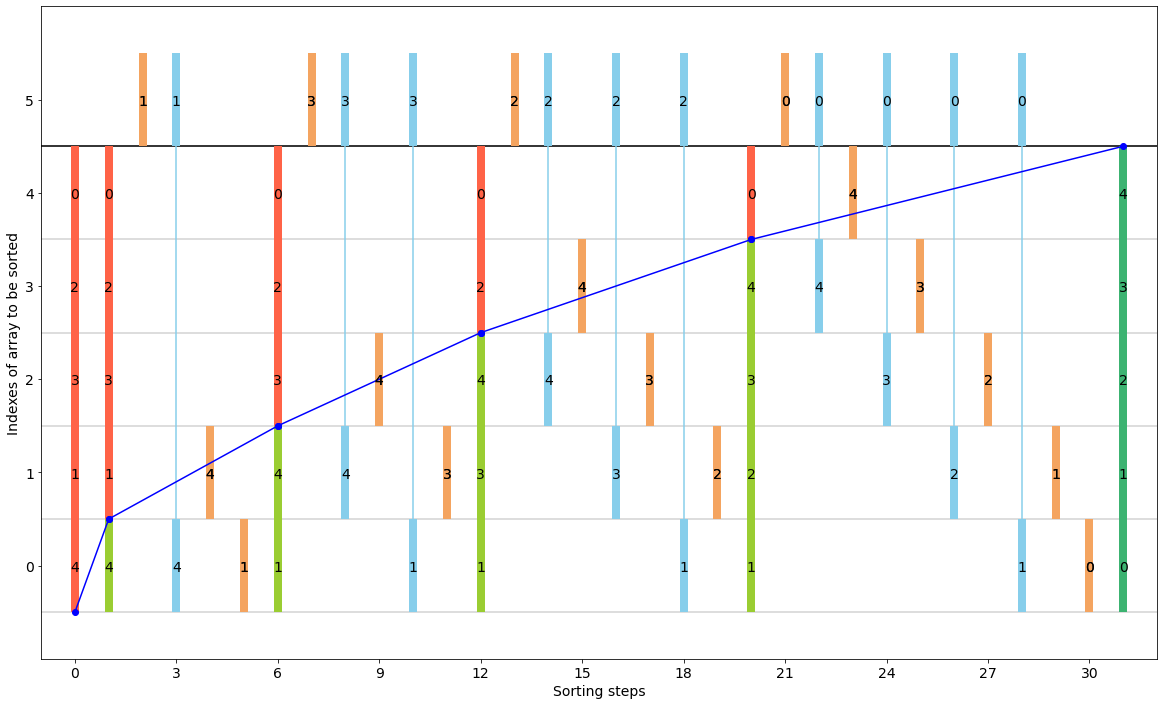

In [12]:
array = [4,1,3,2,0]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, insertionsort(array))
output_graphical_view(ARRAY_SIZE)

In [13]:
# ... and here ...